<a href="https://colab.research.google.com/github/user1535/qai-contest/blob/main/9245/baseline_251215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 48.3 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import sys

# Setting our constants
sys.path.append('..')

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


In [3]:
!wget https://raw.githubusercontent.com/aifactory-team/AFCompetition/main/9245/train_X.npy
!wget https://raw.githubusercontent.com/aifactory-team/AFCompetition/main/9245/train_y.npy

--2026-01-06 14:28:12--  https://raw.githubusercontent.com/aifactory-team/AFCompetition/main/9245/train_X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32896 (32K) [application/octet-stream]
Saving to: ‘train_X.npy’

train_X.npy         100%[===================>]  32.12K  --.-KB/s    in 0s      

2026-01-06 14:28:12 (152 MB/s) - ‘train_X.npy’ saved [32896/32896]

--2026-01-06 14:28:12--  https://raw.githubusercontent.com/aifactory-team/AFCompetition/main/9245/train_y.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256 [a

In [12]:
train_X = np.load("train_X.npy")
train_y = np.load("train_y.npy")


In [14]:
import numpy as np, pandas as pd
from google.colab import data_table

X = np.load("train_X.npy")   # (N, D) complex
y = np.load("train_y.npy")   # (N,)

# 보기 좋게: magnitude(절댓값)로 바꿔서 상위 일부 열만 보기
D = X.shape[1]
cols = [f"mag_{i}" for i in range(D)]
df = pd.DataFrame(np.abs(X), columns=cols)
df.insert(0, "y", y)

# 너무 넓으면 일부 열만
df_small = df.iloc[:50, :1+64]  # y + mag_0~63
data_table.DataTable(df_small)


,y,mag_0,mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,...,mag_54,mag_55,mag_56,mag_57,mag_58,mag_59,mag_60,mag_61,mag_62,mag_63
0,0,0.000110,9.641972e-02,1.001066e-01,0.000101,9.979933e-02,0.000099,0.000103,9.158733e-02,9.971496e-02,...,0.000097,8.579408e-02,9.377004e-02,0.000093,0.000097,8.594221e-02,0.000097,8.493193e-02,8.836785e-02,0.000089
1,0,0.165267,2.980232e-08,2.980232e-08,0.113638,2.980232e-08,0.107780,0.124247,4.470348e-08,5.960464e-08,...,0.094814,2.008263e-08,2.551249e-08,0.083076,0.093945,1.686627e-08,0.097534,1.511203e-08,1.724819e-08,0.067996
2,0,0.165921,7.748604e-07,8.046627e-07,0.141374,8.791685e-07,0.115598,0.127622,8.046627e-07,9.983778e-07,...,0.098852,4.282522e-07,4.848166e-07,0.078222,0.085166,4.581913e-07,0.100254,5.150714e-07,5.197303e-07,0.085584
3,0,0.121003,2.980232e-08,0.000000e+00,0.101218,2.980232e-08,0.098076,0.106009,2.980232e-08,5.960464e-08,...,0.092854,1.293487e-08,2.669570e-08,0.086409,0.092663,1.401637e-08,0.093522,9.031172e-09,1.423346e-08,0.078499
4,1,0.226700,0.000000e+00,1.490116e-07,0.134307,5.960464e-08,0.138821,0.098631,1.192093e-07,1.192093e-07,...,0.071385,4.324944e-08,4.264282e-08,0.089059,0.077511,2.422174e-08,0.099050,2.099595e-08,2.464040e-08,0.064436
5,1,0.185610,7.450581e-08,5.960464e-08,0.119075,8.940697e-08,0.130259,0.103138,0.000000e+00,1.341105e-07,...,0.077472,3.219902e-08,5.202990e-08,0.090898,0.081450,3.117708e-08,0.096871,3.338250e-08,2.692261e-08,0.066778
6,1,0.107434,0.000000e+00,1.490116e-08,0.095948,2.980232e-08,0.099169,0.094279,1.192093e-07,1.490116e-07,...,0.087003,3.461325e-08,2.432071e-08,0.091120,0.087387,2.306498e-08,0.091306,1.342714e-08,1.768796e-08,0.082003
7,1,0.111487,7.450581e-08,1.490116e-08,0.097264,0.000000e+00,0.101253,0.095432,1.192093e-07,5.960464e-08,...,0.086737,7.891819e-09,3.136560e-09,0.091447,0.087258,4.268417e-09,0.091825,9.137278e-09,8.976365e-09,0.080762
8,2,0.594960,1.192093e-07,1.490116e-07,0.304050,7.450581e-08,0.072268,0.196870,6.705523e-08,3.725290e-08,...,0.068910,2.450655e-08,1.535198e-08,0.018842,0.009005,6.994270e-09,0.066754,2.685735e-08,2.214455e-08,0.033729
9,2,0.729115,1.192093e-07,5.960464e-08,0.222258,7.450581e-08,0.113783,0.080348,0.000000e+00,5.215406e-08,...,0.005365,2.425521e-09,5.418487e-09,0.027035,0.018096,1.584009e-09,0.060781,1.733273e-09,1.322474e-09,0.022185


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mag_0'].plot(kind='hist', bins=20, title='mag_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mag_1'].plot(kind='hist', bins=20, title='mag_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='y', y='mag_0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='mag_0', y='mag_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mag_1', y='mag_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mag_0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mag_0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mag_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mag_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mag_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mag_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mag_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mag_3')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['mag_0'].plot(kind='line', figsize=(8, 4), title='mag_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['mag_1'].plot(kind='line', figsize=(8, 4), title='mag_1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
from pennylane import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# ==========================================
# 1. Inference (Model Prediction) - 기존 유지
# ==========================================
def get_predictions(model, inputs):
    """Run inference on inputs using the trained model."""
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        predicted_labels = torch.argmax(outputs, dim=1)
    return predicted_labels.cpu().numpy()

def data_to_tensor(X, y):
    tensor_X = torch.tensor(X, dtype=torch.complex64)
    tensor_y = torch.tensor(y, dtype=torch.long)
    return tensor_X, tensor_y

t_train_X, t_train_y = data_to_tensor(train_X, train_y)
train_dataset = TensorDataset(t_train_X, t_train_y)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [6]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
from pennylane import numpy as np
from torch.utils.data import TensorDataset, DataLoader

n_qubits = 8
n_layers=2
dev = qml.device("default.qubit", wires=n_qubits)
device = "cuda" if torch.cuda.is_available() else "cpu"

def Quantum_classifier(params):
    wires = [i for i in range(n_qubits)]
    params = params.reshape(n_layers,3,n_qubits)
    for layer in range(n_layers-1):
        for i, wire in enumerate(wires):
            qml.Rot(params[layer,0,i], params[layer,1,i], params[layer,2,i], wires=wire)
        for i in range(len(wires)-1):
            qml.CNOT(wires=[wires[i], wires[i+1]])
    for i, wire in enumerate(wires):
        qml.Rot(params[-1,0,i], params[-1,1,i], params[-1,2,i], wires=wire)



@qml.qnode(dev, interface='torch')
def linear_2qubit_block(state, params):
    wires = [i for i in range(n_qubits)]
    qml.StatePrep(state, wires=wires)
    Quantum_classifier(params)

    return qml.probs(wires=[6,7])
class QNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.total_params = n_layers*3*n_qubits  # 15 layers, 3 params per qubit, 8 qubits
        torch.manual_seed(42)
        self.params = nn.Parameter(torch.randn(self.total_params, requires_grad=True)*0.01)

    def forward(self, x):
        preds = linear_2qubit_block(x, self.params)
        return preds

model = QNN()
model.to(device=device)
optimizer = optim.Adam(model.parameters(), lr=0.05)


epochs = 200
loss_history = []
acc_history = []
print(f"--- Training QNN (Params: {model.total_params}) ---")

def quantum_phase_loss(probs, labels):
    """
    Custom Loss Function based on Eq. (10) of the paper.
    Loss = 1 - (Probability of the correct class)
    """
    # probs shape: (batch_size, 4)
    # labels shape: (batch_size,)


    batch_size = probs.shape[0]

    # 정답 인덱스의 확률 추출 (Advanced Indexing)
    label_one_hot = torch.nn.functional.one_hot(labels, num_classes=probs.shape[1])
    probs = probs
    probs = probs / torch.sum(probs, dim=1, keepdim=True)

    loss = -torch.sum(label_one_hot*torch.log(probs), dim=1)

    # 배치 평균 반환
    return torch.mean(loss)


for epoch in range(epochs):
    total_loss = 0
    correct = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X.to(device=device))
        loss = quantum_phase_loss(predictions, batch_y.to(device=device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted_classes = torch.argmax(predictions, dim=1)
        batch_y = batch_y.to(predicted_classes.device)
        correct += (predicted_classes == batch_y).sum().item()

    avg_loss = total_loss / len(train_loader)
    avg_acc = correct / len(train_dataset)
    loss_history.append(avg_loss)
    acc_history.append(avg_acc)
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:02d} | Loss: {avg_loss:.4f} | Train Acc: {avg_acc:.4f}")

--- Training QNN (Params: 120) ---
Epoch 20 | Loss: 0.5615 | Train Acc: 0.8750
Epoch 40 | Loss: 0.5068 | Train Acc: 0.9375
Epoch 60 | Loss: 0.4838 | Train Acc: 0.9375
Epoch 80 | Loss: 0.4811 | Train Acc: 0.9375
Epoch 100 | Loss: 0.4855 | Train Acc: 0.9375
Epoch 120 | Loss: 0.4785 | Train Acc: 0.9375
Epoch 140 | Loss: 0.4814 | Train Acc: 0.9375
Epoch 160 | Loss: 0.4791 | Train Acc: 0.9375
Epoch 180 | Loss: 0.4781 | Train Acc: 0.9375
Epoch 200 | Loss: 0.4803 | Train Acc: 0.9375


(<Figure size 2200x900 with 1 Axes>, <Axes: >)

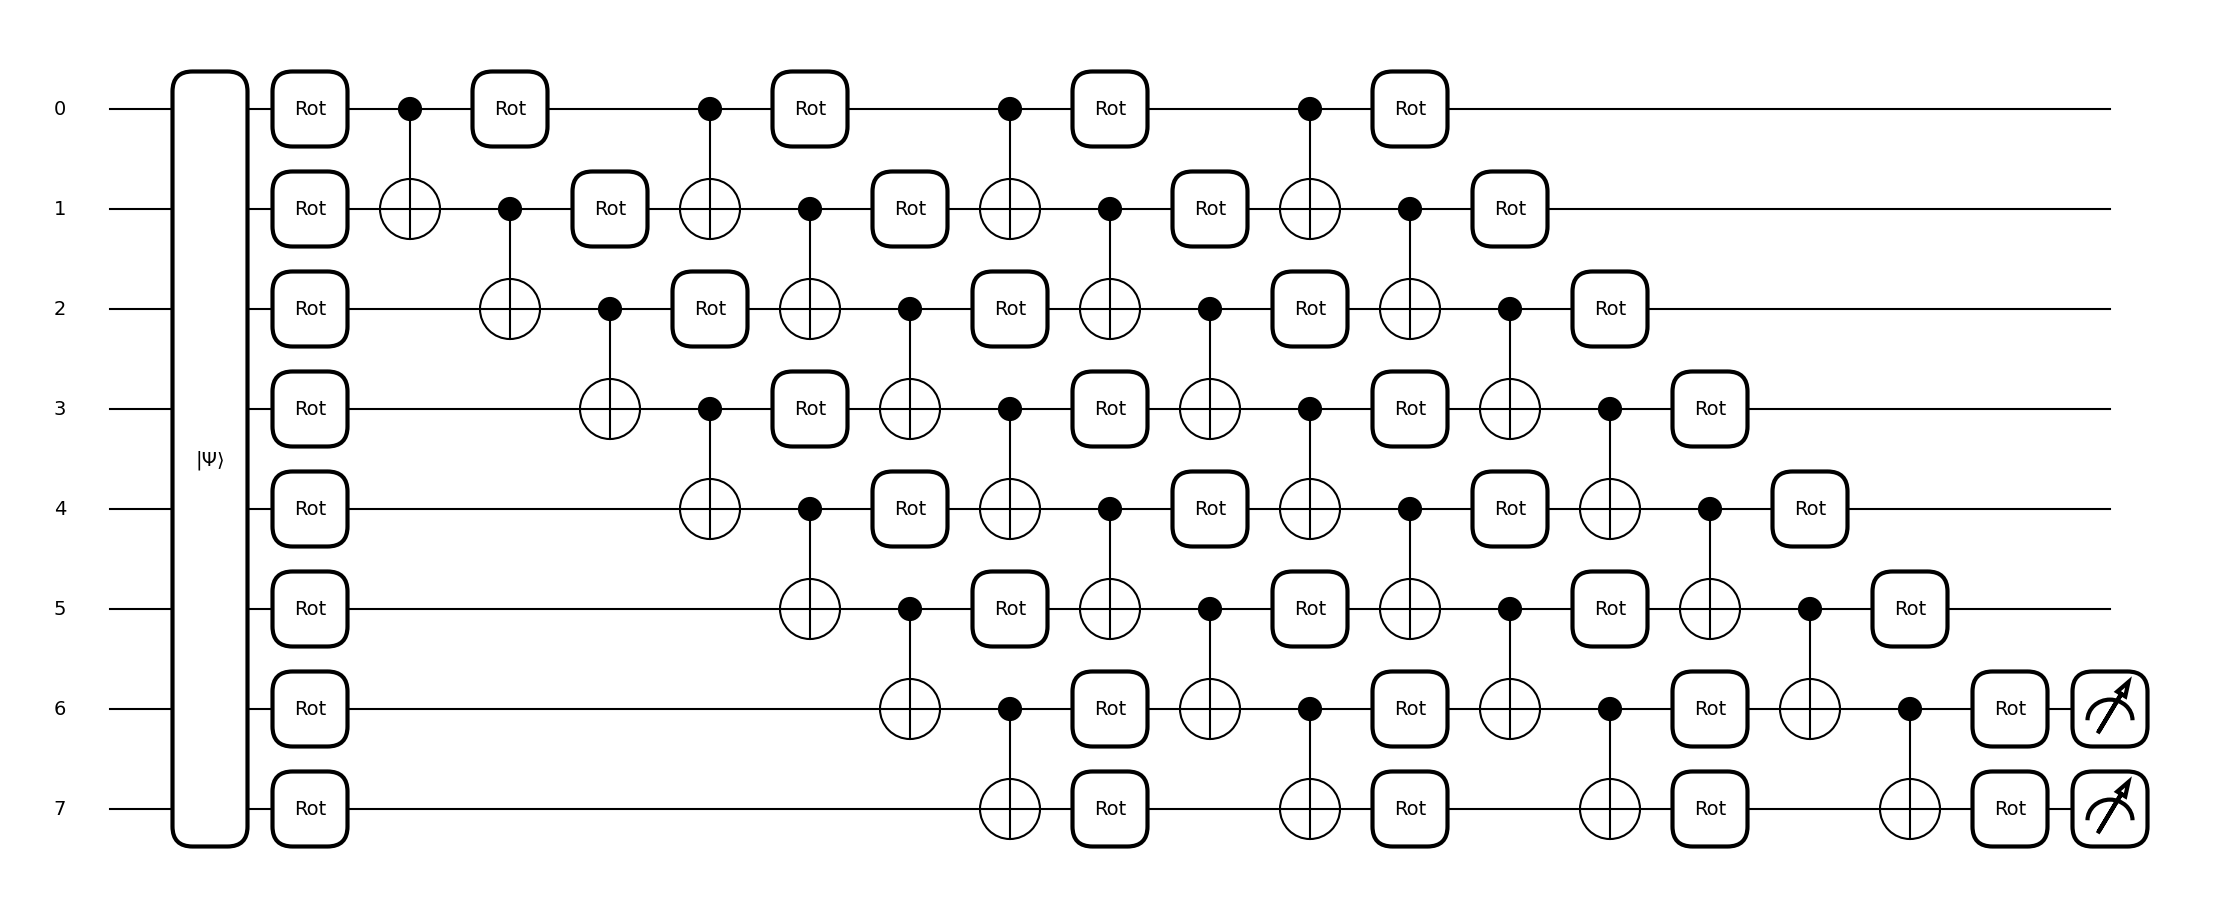

In [7]:
qml.draw_mpl(linear_2qubit_block)(batch_X,model.params)

In [8]:
import json

# 1. Specify measurement qubits
measurements = [6, 7]

# 2. Extract trained parameters
params = model.params.detach().cpu().numpy()

# 3. Define circuit for QASM conversion (Ansatz only, no StatePrep or Measurement)
@qml.qnode(dev, interface='torch')
def Classifier(params):
    Quantum_classifier(params)

# 4. Generate OpenQASM string
qasm_data = qml.to_openqasm(Classifier, measure_all=False)(params)

print(f"✅ Measurement Qubits: {measurements}")
print(f"✅ QASM Data Generated (Length: {len(qasm_data)} characters)")
print("--- QASM Preview (First 10 lines) ---")
print("\n".join(qasm_data.split('\n')[:10]))


with open("./baseline.json", "w") as f:
    json.dump({
        "qasm": qasm_data,
        "measurements": measurements
    }, f)
print("✅ Submission file 'baseline.json' created.")

✅ Measurement Qubits: [6, 7]
✅ QASM Data Generated (Length: 3033 characters)
--- QASM Preview (First 10 lines) ---
OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[8];
rz(0.057330642) q[0];
ry(-0.0026176176) q[0];
rz(-0.024437299) q[0];
rz(0.27092212) q[1];
ry(0.0026692462) q[1];
rz(-0.28873456) q[1];
✅ Submission file 'baseline.json' created.


In [9]:
from google.colab import files
files.download('test.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>